In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.display.float_format = "{:,.2f}".format
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import warnings
warnings.simplefilter("ignore")
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
#user defined functions
def extract_categorycode(input_text,level=0):
    output_text=input_text.split('.')[level]
    return output_text

In [ ]:
#reading data
file_loc="/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Oct.csv"
dataset=pd.read_csv(file_loc)

In [ ]:
#converting datatypes for decreasing RAM usage
dataset['event_time']=pd.to_datetime(dataset['event_time']).dt.tz_convert(None)
dataset['event_type']=dataset['event_type'].astype('category')
dataset['category_id']=dataset['category_id'].astype('category')
dataset['category_code']=dataset['category_code'].astype('category')
dataset['brand']=dataset['brand'].astype('category')

# General Summary

In [ ]:
#creating a summary table for general overview
daily_summary_table=dataset.groupby(by=[dataset['event_time'].dt.normalize()]).agg(Number_of_daily_visits=('user_session',lambda x: x.nunique()),
                                                                                  Number_of_daily_visitors=('user_id',lambda x: x.nunique())
                                                                                  )
sales_filter=dataset['event_type']=='purchase'
sales=dataset.loc[sales_filter].groupby(by=[dataset['event_time'].dt.normalize()]).agg(number_of_daily_sales=('event_type','count'),
                                                                                      Total_daily_sales=('price','sum')
                                                                                      ).reset_index()
daily_summary_table=pd.merge(left=daily_summary_table,
                          right=sales,
                          left_on=['event_time'],
                          right_on=['event_time'],
                          how='left')
daily_summary_table['conversion_rate']=daily_summary_table['number_of_daily_sales']/daily_summary_table['Number_of_daily_visits']

In [ ]:
#Daily Visits
print('Daily Visits Statistics')
print('-'*50)
print(daily_summary_table['Number_of_daily_visits'].describe())
print('-'*50)
print('Visit Statistics by Dates')
print('-'*50)
print(daily_summary_table.groupby(by=daily_summary_table['event_time'].dt.day_name())['Number_of_daily_visits'].describe())

#Plotting number of daily visits
fig=plt.figure(figsize=(18,9))
ax1=fig.add_subplot(2,1,1)
sns.lineplot(x='event_time',
              y='Number_of_daily_visits',
              data=daily_summary_table,
             ax=ax1)
plt.title('Daily Visits')
plt.ylabel('Number of Daily Visits')
plt.xlabel('Dates')

ax2=fig.add_subplot(2,1,2)

sns.boxplot(x=daily_summary_table['event_time'].dt.dayofweek,
            y='Number_of_daily_visits',
            data=daily_summary_table,
           ax=ax2)
plt.title('Number of Visit by days')
plt.ylabel('Number of Visits')
plt.xlabel('Days')
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.tight_layout(pad=3.0);

In [ ]:
#Daily Visitors
print('Daily Visitor Statistics')
print('-'*50)
print(daily_summary_table['Number_of_daily_visitors'].describe())
print('-'*50)
print('Visitor Statistics by Dates')
print('-'*50)
print(daily_summary_table.groupby(by=daily_summary_table['event_time'].dt.day_name())['Number_of_daily_visitors'].describe())

#Plotting number of daily visitors
fig=plt.figure(figsize=(18,9))
ax1=fig.add_subplot(2,1,1)
sns.lineplot(x='event_time',
              y='Number_of_daily_visitors',
              data=daily_summary_table,
            ax=ax1)
plt.title('Daily Visitors')
plt.ylabel('Number of Daily Visitors')
plt.xlabel('Dates')

ax2=fig.add_subplot(2,1,2)
sns.boxplot(x=daily_summary_table['event_time'].dt.dayofweek,
            y='Number_of_daily_visitors',
            data=daily_summary_table,
           ax=ax2)
plt.title('Number of Visitors by days')
plt.ylabel('Number of Visitors')
plt.xlabel('Days')
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.tight_layout(pad=3.0);

In [ ]:
#Conversion rates
print('Conversion Rates Statistics')
print('-'*50)
print(daily_summary_table['conversion_rate'].describe())
print('-'*50)
print('Conversion Rates Statistics by Dates')
print('-'*50)
print(daily_summary_table.groupby(by=daily_summary_table['event_time'].dt.day_name())['conversion_rate'].describe())

#Plotting convergance rates
fig=plt.figure(figsize=(18,9))
ax1=fig.add_subplot(2,1,1)
sns.lineplot(x='event_time',
              y='conversion_rate',
              data=daily_summary_table,
            ax=ax1)
plt.title('Daily Conversion Rates')
plt.ylabel('Conversion Rate')
plt.xlabel('Dates')

ax2=fig.add_subplot(2,1,2)
sns.boxplot(x=daily_summary_table['event_time'].dt.dayofweek,
            y='conversion_rate',
            data=daily_summary_table,
           ax=ax2)
plt.title('Conversion Rates by days')
plt.ylabel('Conversion Rate')
plt.xlabel('Days')
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.tight_layout(pad=3.0);

# Customer Analysis

In [150]:
#creating a customer table

#Filtering sales activities
sales_filter=dataset['event_type']=='purchase'
Customer_table=dataset.loc[sales_filter].groupby(by=['user_id']).agg(number_of_purchases=('user_id','count'),
                                                                     total_sales=('price','sum')).reset_index()

**Repeat Customer**

Customer who buys more than once.

In [151]:
#Calculating number of customers who bought something
Number_of_customers_who_bought_smt=Customer_table['user_id'].nunique()
print('There are {:,.0f} customers, who purchased in October.'.format(Number_of_customers_who_bought_smt))

#Calculating number of purchase activities for each customer
print('-'*50)
print('Distribution of Customer by Number of Purchases')
print(Customer_table['number_of_purchases'].value_counts(normalize=True).head(10))
#Calculationg repeat customers number
print('-'*50)
more_than_one_purchase_filter=Customer_table['number_of_purchases']>1
Number_of_customers_who_bought_more_than_once=Customer_table.loc[more_than_one_purchase_filter].shape[0]
print('There are {:,.0f} repeat customers, who bought more than once.'.format(Number_of_customers_who_bought_more_than_once))

There are 347,118 customers, who purchased in October.
--------------------------------------------------
Distribution of Customer by Number of Purchases
1    0.62
2    0.19
3    0.07
4    0.04
5    0.02
6    0.01
7    0.01
8    0.01
9    0.00
10   0.00
Name: number_of_purchases, dtype: float64
--------------------------------------------------
There are 131,427 repeat customers, who bought more than once.


             user_id  number_of_purchases  total_sales
count     347,118.00           347,118.00   347,118.00
mean  535,997,020.53                 2.14       662.48
std    18,498,600.84                 3.64     2,074.37
min   264,649,825.00                 1.00         0.88
25%   517,104,155.50                 1.00       107.59
50%   535,167,878.50                 1.00       246.52
75%   554,803,791.00                 2.00       595.01
max   566,278,294.00               322.00   265,569.52
             user_id  number_of_purchases  total_sales
count     326,294.00           326,294.00   326,294.00
mean  536,121,594.88                 1.72       402.10
std    18,526,372.41                 1.54       452.16
min   264,649,825.00                 1.00         9.91
25%   517,202,069.25                 1.00       103.50
50%   535,386,226.00                 1.00       230.79
75%   555,016,143.25                 2.00       513.48
max   566,278,294.00                60.00     2,339.25


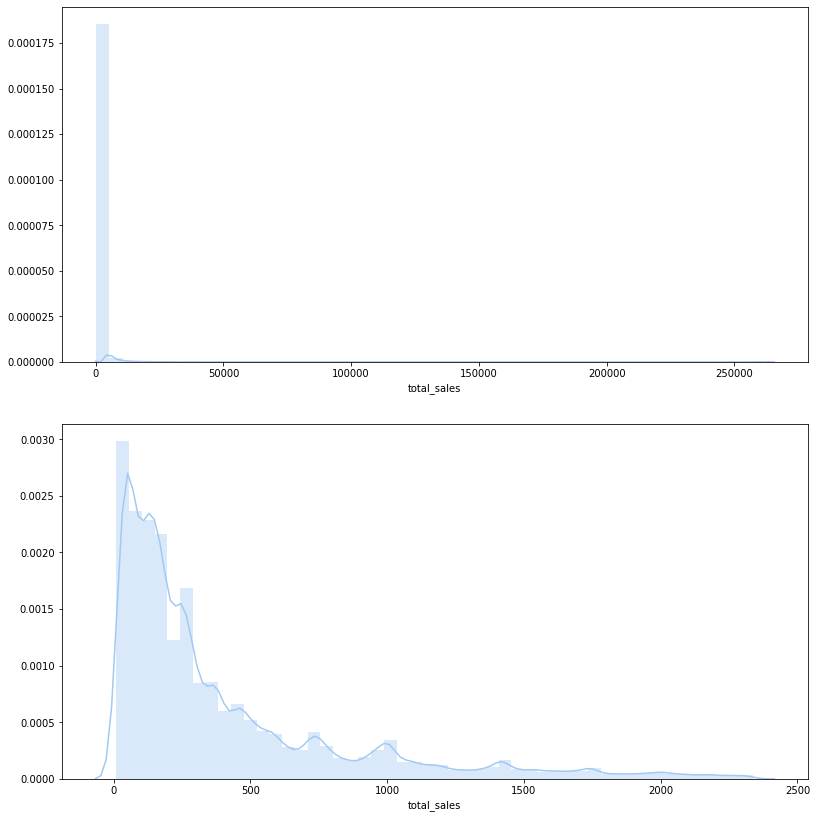

In [152]:
#filtering out the extreme values
sales_threshold=np.percentile(Customer_table['total_sales'],[1,95])
sales_threshold_filter=np.logical_and(Customer_table['total_sales']>=sales_threshold[0],
                                      Customer_table['total_sales']<=sales_threshold[1])
sales_filtered=Customer_table.loc[sales_threshold_filter]
print(Customer_table.describe())
print(sales_filtered.describe())

fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(2,1,1)
sns.distplot(Customer_table['total_sales'],
            ax=ax1)

ax2=fig.add_subplot(2,1,2)
sns.distplot(sales_filtered['total_sales'],
            ax=ax2)

fig.tight_layout(pad=3.0);

In [153]:
#Most valuable customers

#filtering customer with top %10 purchase amount
top10perc_sales_amount=np.percentile(Customer_table['total_sales'],90)
filter_top10perc_sales_amount=Customer_table['total_sales']>=top10perc_sales_amount
top10perc_customers_with_hightest_turnover=Customer_table.loc[filter_top10perc_sales_amount]
regular_customers=Customer_table.loc[~filter_top10perc_sales_amount]

#calculating descriptive statistics
print('Top 10% customers Purchase Amount-Descriptive Statistics')
print('-'*50)
print(top10perc_customers_with_hightest_turnover['total_sales'].describe())
print('-'*50)
total_sales_amount=Customer_table['total_sales'].sum()
print('Total sales: {:,.0f}'.format(total_sales_amount))
total_sales_amount_top10perc=top10perc_customers_with_hightest_turnover['total_sales'].sum()
print('Total sales of top 10% customers: {:,.0f}'.format(total_sales_amount_top10perc))

#calculating descriptive statistics
print('Regular customers Purchase Amount-Descriptive Statistics')
print('-'*50)
print(regular_customers['total_sales'].describe())
print('-'*50)
total_sales_amount_regular_customers=regular_customers['total_sales'].sum()
print('Total sales of regular customers: {:,.0f}'.format(total_sales_amount_regular_customers))

Top 10% customers Purchase Amount-Descriptive Statistics
--------------------------------------------------
count    34,712.00
mean      3,735.44
std       5,625.45
min       1,418.31
25%       1,741.34
50%       2,339.25
75%       3,771.48
max     265,569.52
Name: total_sales, dtype: float64
--------------------------------------------------
Total sales: 229,957,502
Total sales of top 10% customers: 129,664,534
Regular customers Purchase Amount-Descriptive Statistics
--------------------------------------------------
count   312,406.00
mean        321.03
std         314.94
min           0.88
25%          94.21
50%         205.08
75%         442.68
max       1,418.25
Name: total_sales, dtype: float64
--------------------------------------------------
Total sales of regular customers: 100,292,968


Cluster Statistics
--------------------------------------------------
             count     mean      std      min      25%      50%      75%  \
cluster                                                                    
0.00     33,357.00 1,048.88   175.19   779.81   922.00 1,005.30 1,167.54   
1.00    206,920.00   137.95    86.58     0.88    59.20   131.02   201.26   
2.00     72,129.00   509.65   131.06   324.08   390.75   483.92   603.62   
3.00     34,712.00 3,735.44 5,625.45 1,418.31 1,741.34 2,339.25 3,771.48   

               max  
cluster             
0.00      1,418.25  
1.00        324.07  
2.00        779.77  
3.00    265,569.52  


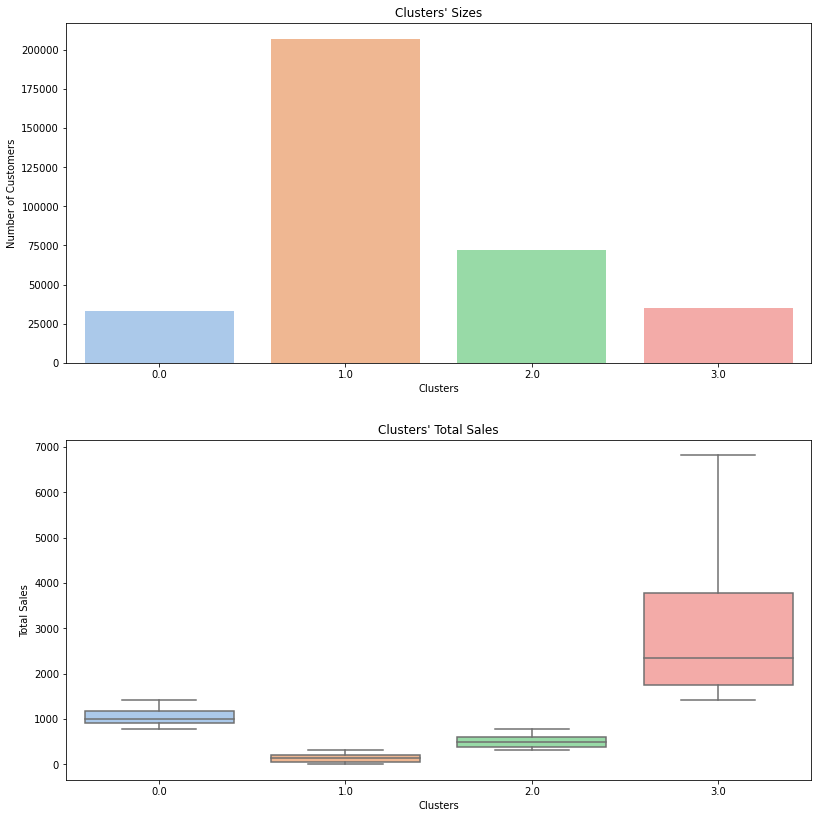

In [154]:
#creating subsegments from regular customers
from sklearn.cluster import KMeans
X=regular_customers['total_sales'].values.reshape(-1,1)
regular_customers['cluster']=Clustering_KMeans=KMeans(n_clusters=3,random_state=15).fit_predict(X)

#merging clusters
Customer_table=pd.merge(left=Customer_table,
                        right=regular_customers[['user_id','cluster']],
                        how='left',
                        left_on='user_id',
                        right_on='user_id')
Customer_table['cluster'].fillna(3,inplace=True)

#Plotting the clusters
print('Cluster Statistics')
print('-'*50)
print(Customer_table.groupby(by=['cluster'])['total_sales'].describe())

fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(2,1,1)
sns.countplot(x='cluster',data=Customer_table,ax=ax1)
plt.xlabel('Clusters')
plt.ylabel('Number of Customers')
plt.title("Clusters' Sizes")
ax1.set_xticklabels(['Medium','Low','High','Star']);

ax2=fig.add_subplot(2,1,2)
sns.boxplot(x='cluster',y='total_sales',data=Customer_table,ax=ax2,showfliers = False)
plt.xlabel('Clusters')
plt.ylabel('Total Sales')
plt.title("Clusters' Total Sales")
fig.tight_layout(pad=3.0)
ax2.set_xticklabels(['Medium','Low','High','Star']);

In [ ]:
#When is it the best time to contact a customer ?


In [ ]:
#What recommendation about products can I make ?

In [ ]:
#How are customers who buy again different from those who buy only once?

In [ ]:
#How do discounts impact customer behaviour ?

In [ ]:
#Segmenting customers

In [ ]:
#rfm